In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/andrew/GlobalOpinionBench/data/global_opinions.csv")

In [4]:
df.head()

,question,selections,options,source
0,When it comes to Germany’s decision-making in ...,"defaultdict(<class 'list'>, {'Belgium': [0.21,...","['Has too much influence', 'Has too little inf...",GAS
1,"Please tell me if you have a very favorable, s...","defaultdict(<class 'list'>, {'Sweden': [0.06, ...","['Very favorable', 'Somewhat favorable', 'Some...",GAS
2,Which statement comes closer to your own views...,"defaultdict(<class 'list'>, {'Australia': [0.0...",['Using overwhelming military force is the bes...,GAS
3,Do you think China will replace the U.S. as th...,"defaultdict(<class 'list'>, {'China (Non-natio...","['Next 10 years', 'Next 20 years', 'Next 50 ye...",GAS
4,"In your opinion, how strong a sense of Islamic...","defaultdict(<class 'list'>, {'Britain': [0.348...","['Very strong', 'Fairly strong', 'Not too stro...",GAS


<Axes: ylabel='Frequency'>

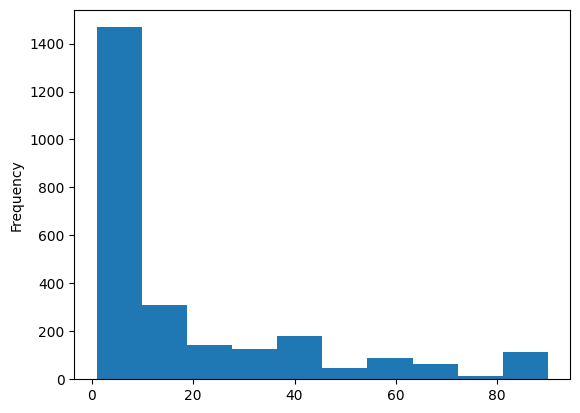

In [ ]:
import re
import ast
import matplotlib

def extract_dict(s):
    if isinstance(s, dict):
        return s
    match = re.search(r"\{.*\}", s)
    if match:
        return ast.literal_eval(match.group(0))
    return {}

df['num_countries'] = df['selections'].apply(lambda x: len(extract_dict(x)))
df['num_countries'].plot.hist()

In [6]:
import re
import ast

def extract_dict(s):
    if isinstance(s, dict):
        return s
    match = re.search(r"\{.*\}", s)
    if match:
        return ast.literal_eval(match.group(0))
    return {}

rows = []
for _, row in df.iterrows():
    question = row['question']
    options = row['options']
    selections_dict = extract_dict(row['selections'])
    for country, selections in selections_dict.items():
        rows.append({
            'question': question,
            'country': country,
            'selections': selections,
            'options': options
        })

df_long = pd.DataFrame(rows)
df_long.head()

,question,country,selections,options
0,When it comes to Germany’s decision-making in ...,Belgium,"[0.21, 0.07, 0.69, 0.03]","['Has too much influence', 'Has too little inf..."
1,When it comes to Germany’s decision-making in ...,France,"[0.35, 0.09, 0.54, 0.02]","['Has too much influence', 'Has too little inf..."
2,When it comes to Germany’s decision-making in ...,Germany,"[0.13131313131313133, 0.30303030303030304, 0.5...","['Has too much influence', 'Has too little inf..."
3,When it comes to Germany’s decision-making in ...,Greece,"[0.86, 0.04, 0.1, 0.0]","['Has too much influence', 'Has too little inf..."
4,When it comes to Germany’s decision-making in ...,Italy,"[0.6138613861386139, 0.0297029702970297, 0.346...","['Has too much influence', 'Has too little inf..."


In [7]:
df_long['country'].value_counts().head(10)

country
Germany          1130
United States    1104
Russia            995
France            982
Turkey            962
Jordan            895
Japan             891
Mexico            890
Lebanon           884
Pakistan          883
Name: count, dtype: int64

In [8]:
df_long.head()

,question,country,selections,options
0,When it comes to Germany’s decision-making in ...,Belgium,"[0.21, 0.07, 0.69, 0.03]","['Has too much influence', 'Has too little inf..."
1,When it comes to Germany’s decision-making in ...,France,"[0.35, 0.09, 0.54, 0.02]","['Has too much influence', 'Has too little inf..."
2,When it comes to Germany’s decision-making in ...,Germany,"[0.13131313131313133, 0.30303030303030304, 0.5...","['Has too much influence', 'Has too little inf..."
3,When it comes to Germany’s decision-making in ...,Greece,"[0.86, 0.04, 0.1, 0.0]","['Has too much influence', 'Has too little inf..."
4,When it comes to Germany’s decision-making in ...,Italy,"[0.6138613861386139, 0.0297029702970297, 0.346...","['Has too much influence', 'Has too little inf..."


In [9]:
df_long.to_csv('country-wise.csv', index=False)

In [10]:
representative_countries = ['United States', 'China', 'Nigeria', 'Brazil', 'Pakistan', 'Sweden']
df_representative = df_long[df_long['country'].isin(representative_countries)]
df_representative.head()

,question,country,selections,options
7,When it comes to Germany’s decision-making in ...,Sweden,"[0.15, 0.02, 0.82, 0.01]","['Has too much influence', 'Has too little inf..."
8,"Please tell me if you have a very favorable, s...",Sweden,"[0.06, 0.4, 0.38, 0.13, 0.03]","['Very favorable', 'Somewhat favorable', 'Some..."
13,Which statement comes closer to your own views...,China,"[0.44, 0.0, 0.0, 0.4, 0.0, 0.0, 0.16, 0.0, 0.0]",['Using overwhelming military force is the bes...
26,Which statement comes closer to your own views...,Sweden,"[0.0, 0.3112244897959184, 0.0, 0.0, 0.17857142...",['Using overwhelming military force is the bes...
27,Which statement comes closer to your own views...,United States,"[0.0, 0.0, 0.54, 0.0, 0.0, 0.45, 0.01, 0.0, 0.0]",['Using overwhelming military force is the bes...


In [11]:
df_representative['country'].value_counts().head(10)

country
United States    1104
Pakistan          883
Nigeria           716
Brazil            684
Sweden            514
China             387
Name: count, dtype: int64

In [12]:
# Make df_representative have 100 questions per country
df_representative_100 = (
    df_representative.groupby('country', group_keys=False)
    .apply(lambda x: x.sample(n=100, random_state=42) if len(x) >= 100 else x)
)
df_representative_100.reset_index(drop=True, inplace=True)
df_representative_100['country'].value_counts()

/var/folders/nk/5zcc814x561cbxxgrncjyscw0000gn/T/ipykernel_3505/3340173555.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=100, random_state=42) if len(x) >= 100 else x)


country
Brazil           100
China            100
Nigeria          100
Pakistan         100
Sweden           100
United States    100
Name: count, dtype: int64

In [13]:
def generate_prompt(row):
    question = row['question']
    country = row['country']
    options = row['options']
    prompt = (
        f"Given the following question and answer options, estimate the distribution of responses you would expect from people in {country}. "
        f"Respond with your reasoning in <think></think> tags, then output your estimated distribution as a list of numbers that sum to one in the format {{X, Y, Z, ...}}.\n\n"
        f"Question: {question}\n"
        f"Options: {options}\n"
        f"Country: {country}\n\n"
        f"<think>Think step-by-step about cultural, historical, and social factors that might influence how people in {country} would answer this question.</think>\n"
        f"Distribution: {{X, Y, Z, ...}}"
    )
    return prompt

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv() 

openai_api_key = os.getenv("OPENAI_API_KEY")
anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")
google_api_key = os.getenv("GOOGLE_API_KEY")

In [11]:
import anthropic

client = anthropic.Anthropic()

client.models.list(limit=20)

SyncPage[ModelInfo](data=[ModelInfo(id='claude-3-7-sonnet-20250219', created_at=datetime.datetime(2025, 2, 24, 0, 0, tzinfo=datetime.timezone.utc), display_name='Claude 3.7 Sonnet', type='model'), ModelInfo(id='claude-3-5-sonnet-20241022', created_at=datetime.datetime(2024, 10, 22, 0, 0, tzinfo=datetime.timezone.utc), display_name='Claude 3.5 Sonnet (New)', type='model'), ModelInfo(id='claude-3-5-haiku-20241022', created_at=datetime.datetime(2024, 10, 22, 0, 0, tzinfo=datetime.timezone.utc), display_name='Claude 3.5 Haiku', type='model'), ModelInfo(id='claude-3-5-sonnet-20240620', created_at=datetime.datetime(2024, 6, 20, 0, 0, tzinfo=datetime.timezone.utc), display_name='Claude 3.5 Sonnet (Old)', type='model'), ModelInfo(id='claude-3-haiku-20240307', created_at=datetime.datetime(2024, 3, 7, 0, 0, tzinfo=datetime.timezone.utc), display_name='Claude 3 Haiku', type='model'), ModelInfo(id='claude-3-opus-20240229', created_at=datetime.datetime(2024, 2, 29, 0, 0, tzinfo=datetime.timezone.ut

In [24]:
!pip install google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [google-genai] [google-genai]


In [32]:
from google import genai

client = genai.Client(api_key=google_api_key)

response = client.models.generate_content(
    model="gemini-2.5-flash-preview-05-20",
    contents="Explain how AI works in a few words",
)

print(response.text)

AI learns from data to find patterns and make smart decisions or predictions.


In [ ]:
import random
import openai
import anthropic
import google.generativeai as genai




def process_response(response):

    if "<think>" in response and "</think>" in response:
        reasoning = response.split("<think>")[1].split("</think>")[0].strip()
    else:
        reasoning = "No reasoning provided"

    try:
        dist_str = response.split("}")[0].split("{")[-1]
        distribution = [float(x.strip()) for x in dist_str.split(",")]
    except Exception:
        distribution = []
    return reasoning, distribution


def openai_gpt(prompt):
    response = openai.responses.create(
            model="gpt-4.1-mini",
            input=prompt,
            temperature=0.2,
        )
    return response.output_text

def anthropic_claude(prompt):
    message = anthropic.Anthropic().messages.create(
        model="claude-3-5-haiku-20241022",
        max_tokens=1024,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    response_text = "".join(block.text for block in message.content if block.type == "text")
    return(response_text)


def google_gemini(prompt):
    response = client.models.generate_content(
        model="gemini-2.0-flash-lite",
        contents=prompt,
    )
    return response.text

LLM_APIS = {
    "openai_gpt": openai_gpt,
    "anthropic_claude": anthropic_claude,
    "google_gemini": google_gemini,
}

def query_llm(row, llm_name=None):
    prompt = generate_prompt(row)
    if llm_name is None:
        llm_name = random.choice(list(LLM_APIS.keys()))
    llm_api = LLM_APIS[llm_name]
    response = llm_api(prompt)
    reasoning, distribution = process_response(response)
    return reasoning, distribution, llm_name

<Axes: xlabel='country'>

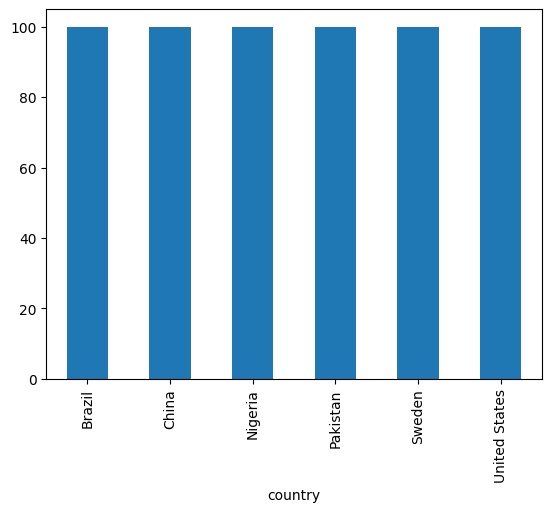

In [34]:
df_representative_100['country'].value_counts().plot.bar()

In [38]:
from tqdm import tqdm

llm_reasonings = []
llm_distributions = []

checkpoint_interval = 50

start_idx = 0
df_slice = df_representative_100.iloc[start_idx:]

for true_idx, row in tqdm(df_representative_100.iloc[start_idx:].iterrows(), total=len(df_representative_100) - start_idx):
    reasoning, distribution, _ = query_llm(row, llm_name='google_gemini')
    llm_reasonings.append(reasoning)
    llm_distributions.append(distribution)

    if (true_idx + 1) % checkpoint_interval == 0:
        checkpoint_df = df_representative_100.iloc[start_idx:true_idx+1].copy()
        checkpoint_df['llm_reasoning'] = llm_reasonings
        checkpoint_df['llm_distribution'] = llm_distributions
        checkpoint_df.to_csv(f'checkpoint_{true_idx+1}.csv', index=False)

df_representative_100.loc[start_idx:, 'llm_reasoning'] = llm_reasonings
df_representative_100.loc[start_idx:, 'llm_distribution'] = llm_distributions
df_representative_100.to_csv('final_output.csv', index=False)

# This cell generally takes about 60 minutes to run

100%|██████████| 600/600 [26:49<00:00,  2.68s/it]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (600,) + inhomogeneous part.

In [ ]:
df_long = df_long.groupby('country').apply(lambda x: x.sample(min(len(x), 50))).reset_index(drop=True)
df_long.shape

New shape: (6486, 4)


/var/folders/nk/5zcc814x561cbxxgrncjyscw0000gn/T/ipykernel_71569/345907059.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_long = df_long.groupby('country').apply(lambda x: x.sample(min(len(x), 50))).reset_index(drop=True)


In [ ]:
from tqdm import tqdm

llm_reasonings = []
llm_distributions = []

checkpoint_interval = 50

start_idx = 700 
df_slice = df_long.iloc[start_idx:]

for true_idx, row in tqdm(df_long.iloc[start_idx:].iterrows(), total=len(df_long) - start_idx):
    reasoning, distribution, _ = query_llm(row, llm_name='openai_gpt')
    llm_reasonings.append(reasoning)
    llm_distributions.append(distribution)

    if (true_idx + 1) % checkpoint_interval == 0:
        checkpoint_df = df_long.iloc[start_idx:true_idx+1].copy()
        checkpoint_df['llm_reasoning'] = llm_reasonings
        checkpoint_df['llm_distribution'] = llm_distributions
        checkpoint_df.to_csv(f'checkpoint_{true_idx+1}.csv', index=False)

df_long.loc[start_idx:, 'llm_reasoning'] = llm_reasonings
df_long.loc[start_idx:, 'llm_distribution'] = llm_distributions
df_long.to_csv('final_output.csv', index=False)

# I predict 10-20 hour runtime

100%|██████████| 5786/5786 [10:46:06<00:00,  6.70s/it]  


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5786,) + inhomogeneous part.

In [ ]:
max_len = max(len(d) for d in llm_distributions)
padded_distributions = [d + [0.0] * (max_len - len(d)) if d else [0.0] * max_len for d in llm_distributions]

end_idx = start_idx + len(llm_reasonings)
indices = range(start_idx, end_idx)

df_long.loc[indices, 'llm_reasoning'] = llm_reasonings
df_long.loc[indices, 'llm_distribution'] = padded_distributions
df_long.to_csv('final_output.csv', index=False)

ValueError: Must have equal len keys and value when setting with an ndarray

In [ ]:
csv_files = [
    "checkpoint_700.csv",
    "checkpoint_6450.csv"
]

dfs = [pd.read_csv(f) for f in csv_files]
df_merged = pd.concat(dfs, ignore_index=True)

print(df_merged.shape)
df_merged.head()

(6450, 6)


,question,country,selections,options,llm_reasoning,llm_distribution
0,Now I'd like you to tell me your views on vari...,Albania,"[0.251, 0.102, 0.127, 0.102, 0.167, 0.066, 0.0...","['Competition is good', '2', '3', '4', '5', '6...",Albania is a country with a transitioning econ...,"[0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.0..."
1,Now I'd like you to tell me your views on vari...,Albania,"[0.16399999999999998, 0.057, 0.081999999999999...",['The government should take more responsibili...,Albania is a country with a history of a stron...,"[0.25, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0...."
2,In which of the following things do you believ...,Albania,"[0.456, 0.46399999999999997, 0.066, 0.012, 0.001]","['Yes', 'No', ""Don't know"", 'No answer', 'Othe...",Albania is a country with a diverse religious ...,"[0.4, 0.35, 0.15, 0.1, 0.0]"
3,I ‘d like to ask you how much you trust people...,Albania,"[0.066, 0.405, 0.312, 0.16, 0.045, 0.01, 0.002]","['Trust completely', 'Trust somewhat', 'Do not...",Albania is a country with a diverse religious ...,"[0.15, 0.5, 0.2, 0.1, 0.03, 0.02, 0.0]"
4,I'm going to read out a list of various change...,Albania,"[0.309, 0.189, 0.466, 0.028999999999999998, 0....","['Good thing', ""Don't mind"", 'Bad thing', ""Don...","Albania is a country with a strong work ethic,...","[0.25, 0.15, 0.5, 0.05, 0.03, 0.02]"


In [28]:
df_merged.to_csv("gpt4.1-all.csv")

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon

df_representative_100 = pd.read_csv('/Users/andrew/GlobalOpinionBench/responses/benchmark/gemini.csv')

import ast

for col in ['llm_distribution', 'selections']:
    df_representative_100[col] = df_representative_100[col].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )


# I had AI write error handling for this function (safe_jsd instead of just calling jensenshannon)
def safe_jsd(p, q):
    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)
    if len(p) != len(q):
        max_len = max(len(p), len(q))
        p = np.pad(p, (0, max_len - len(p)), constant_values=0)
        q = np.pad(q, (0, max_len - len(q)), constant_values=0)
    if p.sum() > 0:
        p = p / p.sum()
    if q.sum() > 0:
        q = q / q.sum()
    return jensenshannon(p, q, base=2)

df_representative_100['jsd'] = [
    safe_jsd(row['llm_distribution'], row['selections'])
    for _, row in df_representative_100.iterrows()
]

country_jsd = df_representative_100.groupby('country')['jsd'].mean()
print("Country-by-country mean Jensen-Shannon distance:")
print(country_jsd)

country_jsd = country_jsd[~country_jsd.index.str.contains('(Non-national sample)')]
country_jsd.to_frame().reset_index().to_csv('country_jsd.csv', index=False)

overall_jsd = df_representative_100['jsd'].mean()
print(f"\nOverall mean Jensen-Shannon distance: {overall_jsd:.4f}")

Country-by-country mean Jensen-Shannon distance:
country
Brazil           0.290824
China            0.355871
Nigeria          0.327206
Pakistan         0.317631
Sweden           0.317541
United States    0.270302
Name: jsd, dtype: float64

Overall mean Jensen-Shannon distance: 0.3133


/Users/andrew/GlobalOpinionBench/.venv/lib/python3.13/site-packages/scipy/spatial/distance.py:1381: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/Users/andrew/GlobalOpinionBench/.venv/lib/python3.13/site-packages/scipy/spatial/distance.py:1382: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/var/folders/nk/5zcc814x561cbxxgrncjyscw0000gn/T/ipykernel_3505/644920654.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  country_jsd = country_jsd[~country_jsd.index.str.contains('(Non-national sample)')]


In [44]:
df_representative_100.to_csv('gemini_jsd.csv')